In [1]:
import os
import re
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def get_metrics(paths):
    metrics, ntails = [], []
    for path in paths:
        if os.path.exists(path):
            metrics.append(torch.load(path, map_location='cpu'))
            ntails.append(int(re.findall(r'fstail\d+', path)[0].replace('fstail', '')))
    return metrics, ntails

def get_head_tail_metrics(metrics, idxs, ntails, key='per_class_accs'):
    sorted_metrics = [np.array(metric[key])[idxs] for metric in metrics]
    head_metrics = [metric[:-ntail].mean() for metric, ntail in zip(sorted_metrics, ntails)]
    tail_metrics = [metric[-ntail:].mean() for metric, ntail in zip(sorted_metrics, ntails)]
    return head_metrics, tail_metrics

freqs = pd.read_csv('../metadata/freqs/class_frequency_incap_imagenet_ori.txt', sep='\t', header=None, names=['class', 'freq'])['freq'].tolist()
idxs = np.argsort(freqs)[::-1]

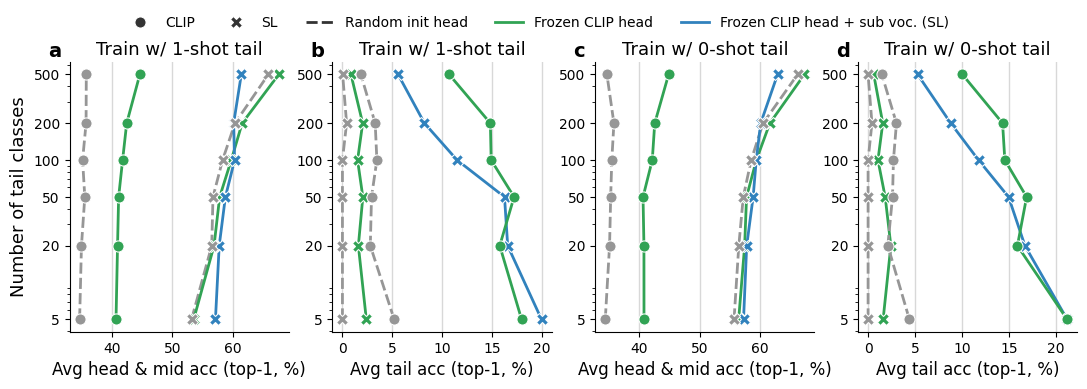

In [40]:
paths_to_plot = {
    'Sup (from scratch)':[
        ['../exps_sup/output/rn50_incap_supcls_bs256_fstail5ceil1/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail20ceil1/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail50ceil1/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail100ceil1/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail200ceil1/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail500ceil1/metrics/metrics_val_latest.pt',
        ],
        ['../exps_sup/output/rn50_incap_supcls_bs256_fstail5ceil0/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail20ceil0/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail50ceil0/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail100ceil0/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail200ceil0/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail500ceil0/metrics/metrics_val_latest.pt',
        ]
    ],
    'Sup (frozen head)':[
        ['../exps_sup/output/rn50_incap_supcls_bs256_fstail5ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail20ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail50ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail100ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail200ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail500ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        ],
        ['../exps_sup/output/rn50_incap_supcls_bs256_fstail5ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail20ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail50ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail100ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail200ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs256_fstail500ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname/metrics/metrics_val_latest.pt',
        ]
    ],
    'Sup (frozen head + sample)':[
        ['../exps_sup/output/rn50_incap_supcls_bs1024_fstail5ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs1024_fstail20ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs1024_fstail50ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs1024_fstail100ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs1024_fstail200ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead_rerunn/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs1024_fstail500ceil1_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead/metrics/metrics_val_latest.pt',
        ],
        ['../exps_sup/output/rn50_incap_supcls_bs1024_fstail5ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs1024_fstail20ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs1024_fstail50ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs1024_fstail100ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs1024_fstail200ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead_rerun/metrics/metrics_val_latest.pt',
        '../exps_sup/output/rn50_incap_supcls_bs1024_fstail500ceil0_freezehead_in1k_clip_rn50_wit400m_a+cname_samplehead/metrics/metrics_val_latest.pt',
        ]
    ],
    'CLIP (from scratch)':[
        ['../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail5ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail20ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail50ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail100ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail200ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail500ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        ],
        ['../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail5ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail20ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail50ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail100ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail200ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-fstail500ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        ]
    ],
    'CLIP (frozen text)':[
        ['../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail5ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail20ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail50ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail100ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail200ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail500ceil1/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        ],
        ['../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail5ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail20ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail50ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail100ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail200ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        '../exps_clip/logs/RN50-lr_0.001-b_1024-e_32-p_amp-freezetext_clip_wit400m-fstail500ceil0/metrics/metrics_imagenet_zeroshot_val_latest.pt',
        ]
    ]
}

ntails_all = [5, 20, 50, 100, 200, 500]
figtitles = ['Train w/ 1-shot tail', 'Train w/ 0-shot tail']
acc_types = ['Head & mid', 'Tail']
style_order = ['Frozen CLIP head', 'Random init head']
hue_order = ['CLIP', 'SL']
markers = ['o', 'X']
palette = sns.color_palette('tab20c')
palette = [palette[-3], palette[8], palette[0], palette[-3], palette[8]]

fig, ax = plt.subplots(1, len(figtitles)*len(acc_types), sharey=True, figsize=(13, 3.5))
for i in range(len(figtitles)):
    dict_for_df = {'ntails':[], 'accs':[], 'Split':[], 'Method':[], 'Model':[], 'Text Head':[]}
    for model_idx, (label, paths) in enumerate(paths_to_plot.items()):
        if label.startswith('CLIP'):
            model_idx += 6

        metrics, ntails = get_metrics(paths[i])
        head_accs, tail_accs = get_head_tail_metrics(metrics, idxs, ntails)
        dict_for_df['accs'].extend(head_accs + tail_accs)
        dict_for_df['ntails'].extend(ntails + ntails)
        dict_for_df['Split'].extend(['Head & mid']*len(ntails) + ['Tail']*len(ntails))
        dict_for_df['Method'].extend(['CLIP (frozen head)' if label.startswith('CLIP') and 'frozen' in label else 'CLIP (rand init)' if label.startswith('CLIP') else \
                                      'SL (sub voc.)' if 'sample' in label else 'SL (rand init)' if 'scratch' in label else 'SL (frozen head)']*len(ntails)*2)
        dict_for_df['Model'].extend(['CLIP' if label.startswith('CLIP') else 'SL']*len(ntails)*2)
        dict_for_df['Text Head'].extend(['Random init head' if 'from scratch' in label else 'Frozen CLIP head']*len(ntails)*2)
    
    df = pd.DataFrame(dict_for_df)
    df['accs'] *= 100
    for j, acc_type in enumerate(acc_types):
        ax[2*i+j].set_title(figtitles[i], fontsize=13)
        sns.lineplot(data=df[df['Split'] == acc_type], y='ntails', x='accs', hue='Method', style='Text Head', ax=ax[2*i+j], errorbar=None, markers=False, dashes=True, linewidth=2,
                     legend='brief', palette=palette, style_order=style_order, orient='y')
        sns.lineplot(data=df[(df['Split'] == acc_type) & (df['Text Head'] == 'Frozen CLIP head')], y='ntails', x='accs', lw=0, hue='Method', style='Model', dashes=False, ax=ax[2*i+j], style_order=hue_order, markers=markers, markersize=8,
                     legend='brief', palette=[palette[1], palette[2], palette[4]], orient='y', errorbar=None)
        sns.lineplot(data=df[(df['Split'] == acc_type) & (df['Text Head'] == 'Random init head')], y='ntails', x='accs', lw=0, hue='Method', style='Model', dashes=False, ax=ax[2*i+j], style_order=hue_order, markers=markers, markersize=8,
                     legend='brief', palette=[palette[0], palette[3]], orient='y', errorbar=None)
        ax[2*i+j].set_yscale('log')
        ax[2*i+j].set_yticks(ntails_all)
        ax[2*i+j].set_yticklabels(ntails_all)
        ax[2*i+j].spines['top'].set_visible(False)
        ax[2*i+j].spines['right'].set_visible(False)
        ax[2*i+j].xaxis.grid(color='gray', linestyle='-', linewidth=1, alpha=0.3)

        ax[2*i+j].set_xlabel('Avg head & mid acc (top-1, %)' if acc_type == 'Head & mid' else 'Avg tail acc (top-1, %)', fontsize=12)
        ax[2*i+j].set_ylabel('Number of tail classes', fontsize=13)
        ax[2*i+j].xaxis.set_tick_params(labelleft=True)
        ax[2*i+j].yaxis.set_tick_params(labelbottom=True)

ax[0].text(-.1, 1.02, 'a', fontsize=14, fontweight='bold', transform=ax[0].transAxes)
ax[1].text(-.1, 1.02, 'b', fontsize=14, fontweight='bold', transform=ax[1].transAxes)
ax[2].text(-.1, 1.02, 'c', fontsize=14, fontweight='bold', transform=ax[2].transAxes)
ax[3].text(-.1, 1.02, 'd', fontsize=14, fontweight='bold', transform=ax[3].transAxes)

# remove legend from subplot
ax[0].legend().remove()
ax[1].legend().remove()
ax[2].legend().remove()
# placeholder
l = matplotlib.lines.Line2D([], [], color="none")
# deduplicate legend
handles, labels = ax[3].get_legend_handles_labels()
handles, labels = handles[-2:] + [handles[8]] + handles[2:4], labels[-2:] + [labels[8]] + ['Frozen CLIP head', 'Frozen CLIP head + sub voc. (SL)']
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(-3.4, 1.22), ncol=7, frameon=False, fontsize=10)
plt.savefig('figs/headtail_accs.pdf', bbox_inches='tight', dpi=300)